In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import re

# Plotting Libraries
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Helper libraries
from collections import defaultdict

In [2]:
republicans = pd.read_csv('../../data/republican_tweets.csv', index_col='id')
democrats = pd.read_csv('../../data/democrat_tweets.csv', index_col='id')

In [3]:
print(f'Republican data size: {republicans.shape}')
print(f'Democrat data size: {democrats.shape}')
print(f'Columns: {republicans.columns.values}')

Republican data size: (1062, 3)
Democrat data size: (1059, 3)
Columns: ['text' 'truncated' 'party']


In [4]:
def clean_tweet(tweet):
    cleaned_tweet = re.sub('@\S+', '', tweet) # Remove mentions
    cleaned_tweet = re.sub('https\S+', '', cleaned_tweet) # Remove urls
    cleaned_tweet = re.sub('\S+…', '', cleaned_tweet) # Remove truncated last word
    
    return cleaned_tweet.strip()

In [5]:
def get_tweet_tokens(tweet):
    delimiters = " ", ":", ";", "\n"
    regexPattern = '|'.join(map(re.escape, delimiters))
    return re.split(regexPattern, tweet)

In [6]:
def generate_vocabulary(tweets):
    vocabulary = defaultdict(int)
    for tweet in tweets:
        tokens = get_tweet_tokens(tweet)
        for token in tokens:
            if not token.endswith('…'):
                vocabulary[token]+=1
    
    return vocabulary

In [7]:
republicans['tweets'] = republicans['text'].apply(clean_tweet)

In [8]:
republicans.drop('text', axis=1)

,truncated,party,tweets
id,,,
1180545384478859264,True,1,ICYMI: 61 Members of Congress have cosponsored...
1180542322909548549,True,1,Congratulations to the 2019 Congressional Vete...
1180535462810787841,True,1,More moments from N. Houston/Montgomery County...
1180535448684367872,False,1,Celebrating 75 years at the Busy Bee Restauran...
1180534029692612609,True,1,Imagine being accused of a crime and not havin...
...,...,...,...
1179818235501383681,True,1,Yesterday I visited The Virginia Chutney Compa...
1179817376268898304,True,1,"Earlier this week, I signed on to the resoluti..."
1179814330528944129,True,1,Proud to join &amp; Houston area Reps in urgi...


In [9]:
republicans = republicans.loc[~republicans.index.duplicated(keep='first')]

In [10]:
vocab = generate_vocabulary(republicans['tweets'])

In [11]:
democrats['tweets'] = democrats['text'].apply(clean_tweet)
democrats.drop('text', axis=1)
democrats = democrats.loc[~democrats.index.duplicated(keep='first')]

In [12]:
republican_corpus = ' '.join(republicans.iloc[:, 3])
democrat_corpus = ' '.join(democrats.iloc[:, 3])

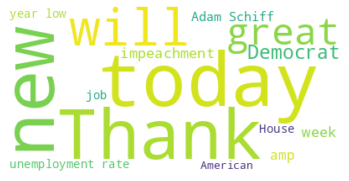

In [13]:
wordcloud = WordCloud(background_color='white', max_words=15).generate(republican_corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

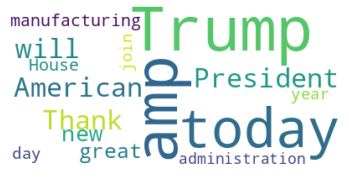

In [14]:
wordcloud = WordCloud(background_color='white', max_words=15).generate(democrat_corpus)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()